# Review Sentiment Analysis

### What we can do :
缺textual
- [✔][-1.1]的感情评分进行[1,5]的归一化
- Normalized the range of the sentiment compound score from [-1,1] to [1,5]
- [✔]评论情感评分的总分布
- The distribution of total sentiment score
- [✔]category内的情感评分分布
- The distribution of sentiment score of each category
- [✔]category内的情感评分mean分析
- Analysis for the mean of each category
- [✔]overall和情感分析的correlation关系
- the correlation between rating and sentiment score
- [✔]与overall进行比较查看是否有虚高和虚低（评分和overall的差值）
- Check if there are large difference (greater than 1) of rating and sentiment score
- [✔]对虚高和虚低进行分析
- Analysis the difference of rating and sentiment score
    - High rating but low score
    - Low rating but high score
- [✔]group by category 以情感评分为指标寻找最受欢迎的子类
- Find the most popular category according to categories' score
- [✔]使用情感评分作为popular的指标，筛选出最popular的top10产品
- Find top10 popular product
- [✔]时间变化的受欢迎程度分析(以日、月为单位）
- The trend of popularity with unit date and month

In [ ]:
import warnings; warnings.simplefilter('ignore')

# Math Packages
import math
import pandas as pd
import numpy as n
# Plot Packages 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#NLP libraries
import spacy
# datetime
import datetime
# from datetime import *

In [3]:
DATA_FOLDER = "./data/"
META_HEALTH_CARE = "health_metadata.pkl"
REVIEWS_HEALTH_CARE = "health_review.pkl"
HEALTH_CARE = "health_merge.pkl"
PRODUCT_REVIEW_INFO = "product_review_info.pkl"

## Sentiment Analysis and Normalization

We use compound score to define whether the review is positive, neutral or negative. According to difinition:
- positive: compound score > 0.05
- neutral: -0.05 < compound score < 0.05
- negative:compound score < -0.05

In [ ]:
# Read product information in Health care including reviews
df_health_care = pd.read_pickle(DATA_FOLDER+ HEALTH_CARE)

df_product_review = df_health_care[["asin","title","reviewText","ReviewTime","categories","overall"]]

analyzer = SentimentIntensityAnalyzer()
df_product_review['reviewScore'] = df_product_review['reviewText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_product_review['reviewScoreNorm'] = df_product_review[['reviewScore']] * 2 + 3

df_product_review.head()

In [ ]:
# save as pickle
df_product_review.to_pickle(DATA_FOLDER + PRODUCT_REVIEW_INFO)

## Sentiment Distribution Analysis

### Total

In this part, we mainly analysis the sentiment score for total products by their ```distribution``` and ```proportion``` of different sentiment occupied in the whole reviews. In addition, the ```extent``` of each sentiment are also provided inside.

In [4]:
# read from pickle
df_product_review = pd.read_pickle(DATA_FOLDER + PRODUCT_REVIEW_INFO)

Plot the distribution of total reviews' sentiment score

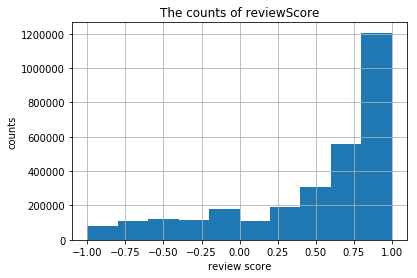

In [16]:
# plot distribution for total
df_product_review["reviewScore"].hist(bins=10)
plt.xlabel("review score")
plt.ylabel("counts")
plt.title("The counts of reviewScore")
plt.show()

⬆ What we can see above is that:
1. very large number of reviews are positive and most of them are close to extremely postive with socre higher than 0.75. 
2. The number of both negative reviews and neutral reviews are much more lower than the positive ones.

Print out the proportion for each sentiment.

In [17]:
pos_num = len(df_product_review[df_product_review["reviewScore"]>=0.05])
neu_num = len(df_product_review[(df_product_review["reviewScore"]>-0.05) & (df_product_review["reviewScore"]<0.05)])
neg_num = len(df_product_review[df_product_review["reviewScore"]<=-0.05])
total_num = len(df_product_review)

print("The number of positive reviews is :{pn} and occupies {p:.3f}% in the review".format(pn=pos_num,p=pos_num*100/total_num))
print("The number of neutral reviews is :{nu} and occupies {p:.3f}% in the review".format(nu=neu_num,p=neu_num*100/total_num))
print("The number of negative reviews is :{nu}and occupies {p:.3f}% in the review".format(nu=neg_num,p=neg_num*100/total_num))

The number of positive reviews is :2353432 and occupies 79.155% in the review
The number of neutral reviews is :124861 and occupies 4.200% in the review
The number of negative reviews is :494893and occupies 16.645% in the review


⬆ As is shown above: 
1. The positive reviews occupied the largest part in total (which is the same conclusion as we drew above) with about 79%, which means many people thinks the products in Health and Care are good. 
2. But for the negative part, there is also a remarkable percentage at about 16.6%, which means there are still lots of people consider that some products cannot satisfy their needs. 
3. Compared to other two kinds, the percentage of neutral reviews is quite smaller, which means most people have very clear attitude towards the products in this category.

Label each sentiment score with ```postive```,```negative```,```neutral``` for convinence.

In [18]:
df_product_review.loc[df_product_review["reviewScore"]>=0.05,"label"]="positive"
df_product_review.loc[(df_product_review["reviewScore"]>-0.05) & (df_product_review["reviewScore"]<0.05),"label"]="neutral"
df_product_review.loc[df_product_review["reviewScore"]<=-0.05,"label"]="negative"

In [19]:
df_product_review.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,month-day,label
0,0077614992,Principles of Mgmt + Oper-CSUF Custom C,This book was a requirement for a college clas...,2013-02-15,[[Health & Personal Care]],0.2263,5,3.4526,02-15,positive
1,0615208479,Brain Fitness Exercises Software,This is a great gift for anyone who wants to h...,2008-12-01,"[[Health & Personal Care, Personal Care]]",0.9748,5,4.9496,12-01,positive
2,0615269990,Occam's Razor,Very helpful in learning about different disea...,2014-04-06,"[[Health & Personal Care, Personal Care, Shavi...",0.8313,5,4.6626,04-06,positive
3,0615269990,Occam's Razor,Occam's Razor is an unbelievably intuitive and...,2013-12-04,"[[Health & Personal Care, Personal Care, Shavi...",0.9984,5,4.9968,12-04,positive
4,0615269990,Occam's Razor,I met the guys from Nerdcore at a medical conf...,2014-04-24,"[[Health & Personal Care, Personal Care, Shavi...",0.4664,2,3.9328,04-24,positive


View the statistic of score for mainly positive reviews and negative reviews to see the averge extent of the sentiment in total and each kind of reviews.

In [20]:
df_product_review[["reviewScore"]].describe()

,reviewScore
count,2.973186e+06
mean,4.938181e-01
std,5.216410e-01
min,-9.999000e-01
25%,2.382000e-01
50%,7.156000e-01
75%,8.910000e-01
max,1.000000e+00


⬆ The average extent of sentiment in total is about 0.43, showing that the sentiment of the whole reviews are positive but not in very high level (if setting 0.75 as a threshold). The standard deviation is 0.5, which means the score is a little bit scattered (because the largest difference of the score is just 2).

In [21]:
df_product_review.loc[df_product_review["reviewScore"]>=0.05,"reviewScore"].describe()

count    2.353432e+06
mean     7.287716e-01
std      2.335450e-01
min      5.000000e-02
25%      5.994000e-01
50%      8.070000e-01
75%      9.141000e-01
max      1.000000e+00
Name: reviewScore, dtype: float64

In [22]:
df_product_review.loc[df_product_review["reviewScore"]<=-0.05,"reviewScore"].describe()

count    494893.000000
mean         -0.499008
std           0.256299
min          -0.999900
25%          -0.713000
50%          -0.493900
75%          -0.286900
max          -0.050000
Name: reviewScore, dtype: float64

Plot the distribution of sentiment score of positive reviews, neutral reviews and negative reviews.

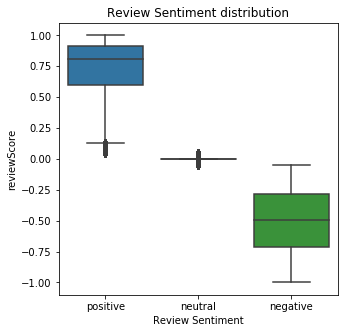

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(x="label", y="reviewScore", data=df_product_review,order=["positive", "neutral","negative"])
plt.xlabel("Review Sentiment")
plt.title("Review Sentiment distribution")
plt.show()

Analysis the statistic of sentiment score of total reviews,positive reviews, neutral reviews and negative reviews.

### Sub-categories

Difference analysis of each sub-categories (2nd)

In [24]:
df_product_cat_review = df_product_review.copy()

def find_subcat(x):
    if(len(x[0])==1):
        # if second category is None
        return 'default'
    else:
        return x[0][1]

df_product_cat_review["subcategories"] = df_product_cat_review["categories"].apply(lambda x:find_subcat(x))
df_product_cat_review = df_product_cat_review[["subcategories","reviewScore","overall","reviewScoreNorm"]]
df_product_cat_review.head()

,subcategories,reviewScore,overall,reviewScoreNorm
0,default,0.2263,5,3.4526
1,Personal Care,0.9748,5,4.9496
2,Personal Care,0.8313,5,4.6626
3,Personal Care,0.9984,5,4.9968
4,Personal Care,0.4664,2,3.9328


In [25]:
df_product_cat_group = df_product_cat_review.groupby('subcategories').mean().sort_values('reviewScore',ascending = False)
df_product_cat_group

,reviewScore,overall,reviewScoreNorm
subcategories,,,
Baby & Child Care,0.609269,4.205483,4.218539
Stationery & Party Supplies,0.602765,4.102568,4.205530
Sports Nutrition,0.589311,4.237650,4.178623
Personal Care,0.519627,4.102509,4.039254
Household Supplies,0.518710,4.192494,4.037421
default,0.490678,4.019077,3.981356
Sexual Wellness,0.486434,3.694860,3.972868
Medical Supplies & Equipment,0.485439,4.071935,3.970878
Health Care,0.458111,4.127009,3.916223


Plot the distribution of sentiment score for each category.

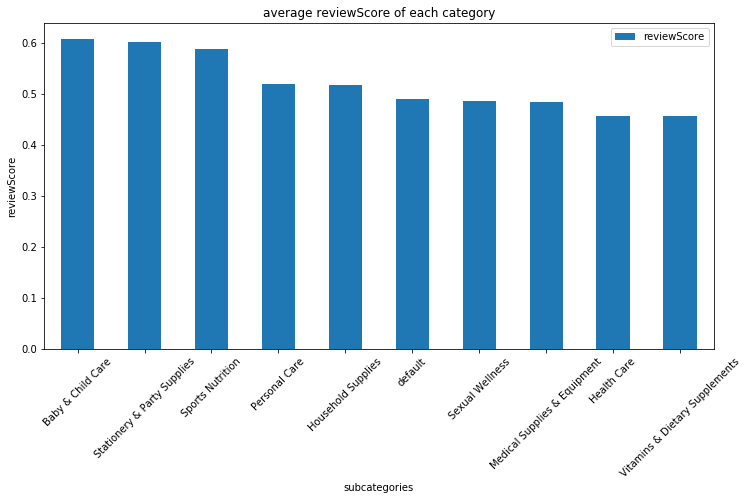

In [26]:
df_product_cat_group.plot.bar(y='reviewScore', rot=45,figsize=(12,6),color='C0')
plt.ylabel("reviewScore")
plt.title("average reviewScore of each category")
plt.show()

Get difference of sentiment score in each category

In [27]:
df_product_cat_group["Diff"] = df_product_cat_group["reviewScoreNorm"] - df_product_cat_group["overall"]
df_product_cat_group

,reviewScore,overall,reviewScoreNorm,Diff
subcategories,,,,
Baby & Child Care,0.609269,4.205483,4.218539,0.013055
Stationery & Party Supplies,0.602765,4.102568,4.205530,0.102962
Sports Nutrition,0.589311,4.237650,4.178623,-0.059027
Personal Care,0.519627,4.102509,4.039254,-0.063255
Household Supplies,0.518710,4.192494,4.037421,-0.155073
default,0.490678,4.019077,3.981356,-0.037721
Sexual Wellness,0.486434,3.694860,3.972868,0.278008
Medical Supplies & Equipment,0.485439,4.071935,3.970878,-0.101057
Health Care,0.458111,4.127009,3.916223,-0.210786


Plot the difference in each category between rating and sentiment score.

In [28]:
df_cat_diff = df_product_cat_group.loc[:,["overall","reviewScoreNorm"]]
df_cat_diff = df_cat_diff.stack()
df_cat_diff = df_cat_diff.to_frame()
df_cat_diff.reset_index(inplace=True)
df_cat_diff.columns = df_cat_diff.columns.astype(str)
df_cat_diff.rename(columns={"level_1":"scoretype","0":"score"},inplace=True)
df_cat_diff.loc[df_cat_diff["scoretype"]=='overall','scoretype'] = 'rating'

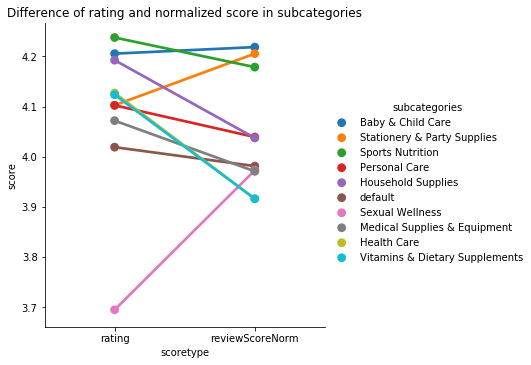

In [29]:
sns.catplot(x="scoretype", y="score",hue="subcategories", kind="point", data=df_cat_diff)
plt.title("Difference of rating and normalized score in subcategories")
plt.show()

Absolute difference analysis

In [30]:
df_product_cat_group["absDiff"] = abs(df_product_cat_group["Diff"])
df_product_cat_group.sort_values("absDiff")

,reviewScore,overall,reviewScoreNorm,Diff,absDiff
subcategories,,,,,
Baby & Child Care,0.609269,4.205483,4.218539,0.013055,0.013055
default,0.490678,4.019077,3.981356,-0.037721,0.037721
Sports Nutrition,0.589311,4.237650,4.178623,-0.059027,0.059027
Personal Care,0.519627,4.102509,4.039254,-0.063255,0.063255
Medical Supplies & Equipment,0.485439,4.071935,3.970878,-0.101057,0.101057
Stationery & Party Supplies,0.602765,4.102568,4.205530,0.102962,0.102962
Household Supplies,0.518710,4.192494,4.037421,-0.155073,0.155073
Vitamins & Dietary Supplements,0.458098,4.123549,3.916197,-0.207352,0.207352
Health Care,0.458111,4.127009,3.916223,-0.210786,0.210786


## Rating VS ReviewScore

Correlation

In [31]:
# the correlation efficience between overall and reviewScoreNorm
df_product_review.corr(method="pearson").iloc[1,2]

0.445401965394518

Difference Analysis

In [32]:
df_product_review["Diff"] = df_product_review["reviewScoreNorm"] - df_product_review["overall"]
df_product_review.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,month-day,label,Diff
0,0077614992,Principles of Mgmt + Oper-CSUF Custom C,This book was a requirement for a college clas...,2013-02-15,[[Health & Personal Care]],0.2263,5,3.4526,02-15,positive,-1.5474
1,0615208479,Brain Fitness Exercises Software,This is a great gift for anyone who wants to h...,2008-12-01,"[[Health & Personal Care, Personal Care]]",0.9748,5,4.9496,12-01,positive,-0.0504
2,0615269990,Occam's Razor,Very helpful in learning about different disea...,2014-04-06,"[[Health & Personal Care, Personal Care, Shavi...",0.8313,5,4.6626,04-06,positive,-0.3374
3,0615269990,Occam's Razor,Occam's Razor is an unbelievably intuitive and...,2013-12-04,"[[Health & Personal Care, Personal Care, Shavi...",0.9984,5,4.9968,12-04,positive,-0.0032
4,0615269990,Occam's Razor,I met the guys from Nerdcore at a medical conf...,2014-04-24,"[[Health & Personal Care, Personal Care, Shavi...",0.4664,2,3.9328,04-24,positive,1.9328


Plot the difference distribution

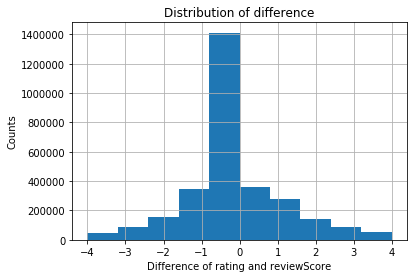

In [33]:
df_product_review["Diff"].hist(bins=10)
plt.xlabel("Difference of rating and reviewScore")
plt.ylabel("Counts")
plt.title("Distribution of difference")
plt.show()

set threshold representing that the reviewScore is consistent with the rating, otherwise it's not.

In [34]:
#the number of inconsistence and consistence
threshold = 1.0
diff_g1 = len(df_product_review[(df_product_review["Diff"]>threshold) | (df_product_review["Diff"]<(-1)*threshold)])
diff_s1 = len(df_product_review[(df_product_review["Diff"]<=threshold) & (df_product_review["Diff"]>=(-1)*threshold)])

print("The number of consistent rating with difference which is not greater than one is {s1}, and occupies {p:.3f}% in reviews"\
                                                          .format(s1=diff_s1,p=diff_s1*100/total_num))
print("The number of inconsistent rating with difference which is greater than one is {g1}, and occupies {p:.3f}% in reviews"\
                                                          .format(g1=diff_g1,p=diff_g1*100/total_num))

The number of consistent rating with difference which is not greater than one is 2053019, and occupies 69.051% in reviews
The number of inconsistent rating with difference which is greater than one is 920167, and occupies 30.949% in reviews


In [35]:
df_diff_g1 = df_product_review[(df_product_review["Diff"]>threshold) | (df_product_review["Diff"]<(-1)*threshold)]

df_diff_g1["absDiff"] = abs(df_diff_g1["Diff"])
df_diff_g1["absDiff"].describe()

count    920167.000000
mean          2.032174
std           0.792226
min           1.000200
25%           1.363600
50%           1.873400
75%           2.592000
max           4.000000
Name: absDiff, dtype: float64

- high sentiment score but with low rating
- low sentiment score but with high rating

Percentage of large difference for two situations.

In [36]:
High_score_low_rat = df_product_review[df_product_review["Diff"]>1].sort_values("Diff",ascending=False)
High_score_low_rat.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,month-day,label,Diff
2026735,B004V503B6,OMEGA III Maxx - Omega 3 Pharmaceutical Grade ...,*This is a side-by-side comparison of Omega II...,2013-03-01,"[[Health & Personal Care, Vitamins & Dietary S...",1.0000,1,5.0000,03-01,positive,4.0000
1911198,B004F4PR6Y,Deluxe Tattoo Kit 2 Machine Gun Power Supply N...,"Let Me Start Out By Saying I Did NOT Purchase,...",2013-11-03,"[[Health & Personal Care, Personal Care, Body ...",1.0000,1,5.0000,11-03,positive,4.0000
1465370,B002NXTOJK,"Omega 3's Anti-Inflammatory 60ct Bottle, Arthr...",*This is a side-by-side comparison of Omega XL...,2013-08-26,"[[Health & Personal Care, Health Care, Pain Re...",0.9999,1,4.9998,08-26,positive,3.9998
2570936,B009P6632O,# 1 Omega Xl New Zealand - Powerful Omega 3 &q...,*This is a side-by-side comparison of Omega XL...,2013-10-27,"[[Health & Personal Care, Vitamins & Dietary S...",0.9999,1,4.9998,10-27,positive,3.9998
2746538,B00CDGJIAW,2000mg FISH OIL OMEGA 3 SUPPLEMENTS - Triple S...,*This is a side-by-side comparison of Pacific ...,2013-07-22,"[[Health & Personal Care, Vitamins & Dietary S...",0.9999,1,4.9998,07-22,positive,3.9998


In [37]:
print("The percentage of sentiment with high sentiment score but low rating is :{p:.3f}%".format(p=len(High_score_low_rat)*100/diff_g1))

The percentage of sentiment with high sentiment score but low rating is :43.987%


In [38]:
Low_score_high_rat = df_product_review[df_product_review["Diff"]<-1].sort_values("Diff",ascending=True)
Low_score_high_rat.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,month-day,label,Diff
1072320,B001E0STN0,American Biotech Labs Silver Biotics 16 oz ( M...,Here are a couple of exerts from the informati...,2014-05-03,"[[Health & Personal Care, Vitamins & Dietary S...",-0.9999,5,1.0002,05-03,negative,-3.9998
1641763,B0039PH51K,"Acupressure Mat Spike Body Mat for stress, nec...",I was skeptical when I first read about this. ...,2013-01-23,"[[Health & Personal Care, Health Care, Alterna...",-0.9997,5,1.0006,01-23,negative,-3.9994
1439810,B002K4UBCQ,1st grade BiLuoChun Green Tea 100g Gift Box-Ne...,Green Tea Ingredient Slows Breast Cancer-Antio...,2009-09-26,"[[Health & Personal Care, Vitamins & Dietary S...",-0.9995,5,1.0010,09-26,negative,-3.9990
1440258,B002K6FRX2,Yuexi Cuilan (Yuexi Green Orchid Tea) - Organi...,Yuexi Cuilan (Yuexi Green Orchid Tea) - Organi...,2009-09-26,[[Health & Personal Care]],-0.9994,5,1.0012,09-26,negative,-3.9988
1439493,B002K2MUUY,"Lipton Green Tea - 100% Natural, New Spring Gr...",Green Tea Ingredient Slows Breast Cancer-Antio...,2009-09-26,[[Health & Personal Care]],-0.9994,5,1.0012,09-26,negative,-3.9988


In [39]:
print("The percentage of sentiment with low sentiment score but high rating is :{p:.3f}%".format(p=len(Low_score_high_rat)*100/diff_g1))

The percentage of sentiment with low sentiment score but high rating is :56.013%


## Attitude Analysis

sub-categories

In [40]:
df_product_cat_group

,reviewScore,overall,reviewScoreNorm,Diff,absDiff
subcategories,,,,,
Baby & Child Care,0.609269,4.205483,4.218539,0.013055,0.013055
Stationery & Party Supplies,0.602765,4.102568,4.205530,0.102962,0.102962
Sports Nutrition,0.589311,4.237650,4.178623,-0.059027,0.059027
Personal Care,0.519627,4.102509,4.039254,-0.063255,0.063255
Household Supplies,0.518710,4.192494,4.037421,-0.155073,0.155073
default,0.490678,4.019077,3.981356,-0.037721,0.037721
Sexual Wellness,0.486434,3.694860,3.972868,0.278008,0.278008
Medical Supplies & Equipment,0.485439,4.071935,3.970878,-0.101057,0.101057
Health Care,0.458111,4.127009,3.916223,-0.210786,0.210786


``Explanation``

For each product

In [41]:
# for each product
df_average_product = df_product_review[["asin","reviewScore"]]
df_average_product = df_average_product.groupby("asin").mean()

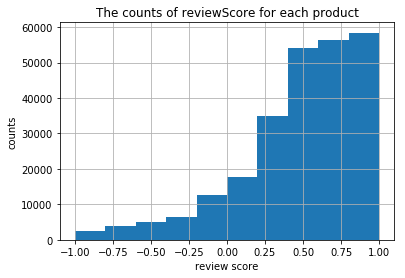

In [42]:
# plot distribution for total
df_average_product["reviewScore"].hist(bins=10)
plt.xlabel("review score")
plt.ylabel("counts")
plt.title("The counts of reviewScore for each product")
plt.show()

In [43]:
df_review_g1 = df_product_review.groupby("asin").count()[["title"]]
df_review_g1 = df_review_g1[df_review_g1["title"]>5]
asin = df_review_g1.index.values
asin = list(asin)
df_review_g1.columns = ['Counts']
df_product_review_g1 = df_product_review[df_product_review['asin'].isin(asin)]
df_product_review_g1 = df_product_review_g1.groupby("asin").mean()
df_product_review_g1['Counts'] = df_review_g1['Counts']
df_product_review_g1 = df_product_review_g1.loc[:,df_product_review_g1.columns!='Diff']

In [44]:
df_product_info = df_product_review[['asin','title','categories']]
df_product_info = df_product_info.drop_duplicates(["asin"])
df_product_info.head()

,asin,title,categories
0,0077614992,Principles of Mgmt + Oper-CSUF Custom C,[[Health & Personal Care]]
1,0615208479,Brain Fitness Exercises Software,"[[Health & Personal Care, Personal Care]]"
2,0615269990,Occam's Razor,"[[Health & Personal Care, Personal Care, Shavi..."
5,0615315860,101 BlenderBottle Recipes Quick and Easy,[[Health & Personal Care]]
7,0615406394,"Aphrodite Reborn - Women's Stories of Hope, Co...",[[Health & Personal Care]]


In [45]:
df_product_review_subset = df_product_review_g1.merge(df_product_info,left_index=True,right_on='asin')
df_product_review_subset = df_product_review_subset[['asin','title','categories','reviewScore','overall','reviewScoreNorm']]
df_product_review_subset['Diff'] = df_product_review_subset['reviewScoreNorm'] - df_product_review_subset['overall']
top10_product = df_product_review_subset.sort_values(by=["reviewScoreNorm","overall"],ascending=False).head(10)

In [46]:
top10_product

,asin,title,categories,reviewScore,overall,reviewScoreNorm,Diff
1761381,B003USZZ2W,Solarrific P7002 Handcrank Personal Shaver,"[[Health & Personal Care, Personal Care, Shavi...",0.975075,3.750000,4.950150,1.200150
2970136,B00JF41NS0,"Coromega Be Bright Superfood Oil Blend, Coconu...","[[Health & Personal Care, Vitamins & Dietary S...",0.970183,5.000000,4.940367,-0.059633
1159298,B001G909FK,Intentional Chocolate Caramel Squares - 6 pieces,"[[Health & Personal Care, Health Care, Stress ...",0.969283,5.000000,4.938567,-0.061433
1472884,B002PEXR2W,"Inward Journey, Learn to Breath Again, A Yoga ...",[[Health & Personal Care]],0.967083,5.000000,4.934167,-0.065833
2981279,B00KXS6LRU,Vitavana&#153; Omega-3 Krill Oil &#10030; 1000...,"[[Health & Personal Care, Vitamins & Dietary S...",0.966217,5.000000,4.932433,-0.067567
1542750,B002XDQIUI,"J.R. Watkins All Purpose Cleaner, Orange Citru...","[[Health & Personal Care, Household Supplies, ...",0.965800,4.333333,4.931600,0.598267
2859954,B00F2KZVOI,"NuZest Clean Lean Protein (pea), Vanilla, 1.1 ...","[[Health & Personal Care, Sports Nutrition, Pr...",0.965683,4.833333,4.931367,0.098033
1325595,B0025ZO1LW,Valobra Almond Soft Shaving Soap,"[[Health & Personal Care, Personal Care, Shavi...",0.964917,3.666667,4.929833,1.263167
252854,B0007XQ2W0,Castle Forbes Lime Oil Aftershave Balm,"[[Health & Personal Care, Personal Care, Shavi...",0.964117,4.500000,4.928233,0.428233
866478,B0012TOC2K,&quot;I'm Grateful You're My Friend&quot; Touc...,"[[Health & Personal Care, Health Care, Massage...",0.963633,5.000000,4.927267,-0.072733


In [47]:
top10_product["subcategories"] = top10_product["categories"].apply(lambda x:find_subcat(x))
top10_product["subcategories"].value_counts()

Personal Care                     3
Vitamins & Dietary Supplements    2
Health Care                       2
default                           1
Household Supplies                1
Sports Nutrition                  1
Name: subcategories, dtype: int64

In [48]:
top10_product["title"].values

array(['Solarrific P7002 Handcrank Personal Shaver',
       'Coromega Be Bright Superfood Oil Blend, Coconut Chia, 10.6 Ounce',
       'Intentional Chocolate Caramel Squares - 6 pieces',
       'Inward Journey, Learn to Breath Again, A Yoga Meditation by Marianne Wells',
       'Vitavana&#153; Omega-3 Krill Oil &#10030; 1000mg Daily with EPA/DHA and Astaxanthin &#10030; Promotes Joint &amp; Heart Health, Weight Loss and Supports Healthy Cholesterol Levels Already In The Normal Range &#10030; Moleculary Distilled for Purity &#10030; 100% Money-Back Guarantee!',
       'J.R. Watkins All Purpose Cleaner, Orange Citrus, 24-Ounce Bottles (Pack of 6)',
       'NuZest Clean Lean Protein (pea), Vanilla, 1.1 pounds',
       'Valobra Almond Soft Shaving Soap',
       'Castle Forbes Lime Oil Aftershave Balm',
       "&quot;I'm Grateful You're My Friend&quot; Touching 8x10 Poem, Double-matted in White Over Royal Blue and Enhanced with Watercolor Graphics. A Gift For A Friend."],
      dtype=object

``Explanation``

### Trend of popularity as time goes.

In [49]:
df_time_popularity = df_product_review.groupby("ReviewTime").mean()[["reviewScoreNorm"]]

In [50]:
df_time_popularity.head()

,reviewScoreNorm
ReviewTime,
1999-10-20,1.5984
1999-11-02,3.7604
2000-03-16,4.6394
2000-04-28,4.7086
2000-04-29,4.1218


In [51]:
df_time_popularity.reset_index(inplace=True)
flag = df_time_popularity['ReviewTime'].map(lambda x: (x.year>2003)&((x.year<2014)))
df_time_popularity_subset = df_time_popularity.loc[flag]

In [52]:
df_time_popularity_subset.head()

,ReviewTime,reviewScoreNorm
832,2004-01-01,4.647871
833,2004-01-02,4.549967
834,2004-01-03,4.861120
835,2004-01-04,4.003660
836,2004-01-05,3.882657


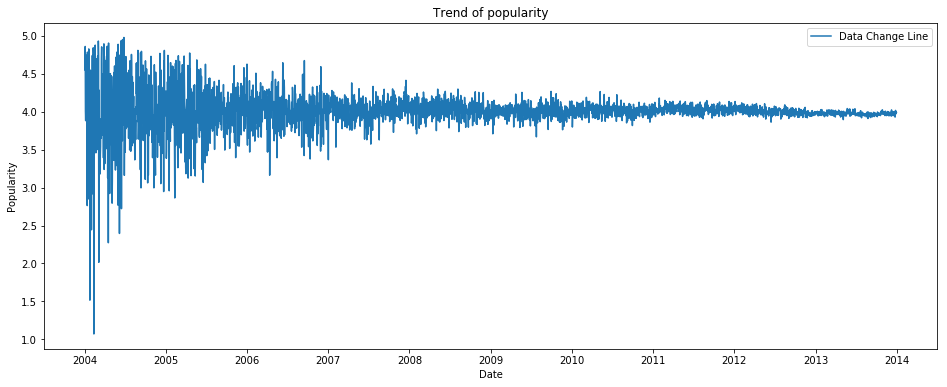

In [53]:
plt.figure(figsize=(16,6))
plt.plot(df_time_popularity_subset.ReviewTime, df_time_popularity_subset.reviewScoreNorm)
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Trend of popularity')
plt.legend(['Data Change Line'])
plt.show()

``Explanation``

以月为单位再画一个走向图

In [54]:
df_product_review.dtypes

asin                       object
title                      object
reviewText                 object
ReviewTime         datetime64[ns]
categories                 object
reviewScore               float64
overall                     int64
reviewScoreNorm           float64
month-day                  object
label                      object
Diff                      float64
dtype: object

In [55]:
df_product_review["Yearmonth"] = df_product_review['ReviewTime'].apply(lambda x: x.strftime('%Y-%m'))

In [56]:
df_product_review.sort_values('Yearmonth').head(3)

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,month-day,label,Diff,Yearmonth
2798,B00000JHQ7,Duracell MN1500B8 AA (8-Pack),I expected so much and yet recieved so little ...,1999-10-20,"[[Health & Personal Care, Household Supplies, ...",-0.7008,1,1.5984,10-20,negative,0.5984,1999-10
2492,B00000JHQ0,NaN,I've used these batteries my entire life in ev...,1999-11-02,[[Health & Personal Care]],0.3802,5,3.7604,11-02,positive,-1.2396,1999-11
2197,B00000J47L,Energizer Power Plus NiMH AA Rechargeable Batt...,I bought a bunch of Energizer's AA ACCU NiMH r...,2000-03-16,"[[Health & Personal Care, Household Supplies]]",0.8197,4,4.6394,03-16,positive,0.6394,2000-03


In [57]:
df_month_popularity = df_product_review.groupby("Yearmonth").mean()[["reviewScoreNorm"]]
df_month_popularity.reset_index(inplace=True)
df_month_popularity['Yearmonth'] = pd.to_datetime(df_month_popularity['Yearmonth'])
flag = df_month_popularity['Yearmonth'].map(lambda x: (x.year>2003)&((x.year<2014)))
df_month_popularity_subset = df_month_popularity.loc[flag]
df_month_popularity_subset.head()

,Yearmonth,reviewScoreNorm
48,2004-01-01,4.083851
49,2004-02-01,4.137329
50,2004-03-01,4.040955
51,2004-04-01,3.930255
52,2004-05-01,3.999891


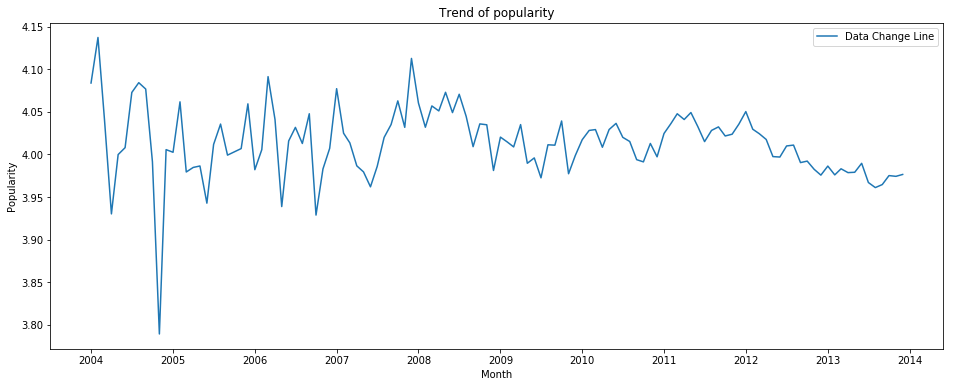

In [58]:
plt.figure(figsize=(16,6))
plt.plot(df_month_popularity_subset.Yearmonth, df_month_popularity_subset.reviewScoreNorm)
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.title('Trend of popularity')
plt.legend(['Data Change Line'])
plt.show()

In [5]:
def interested_day(df,interested_day_name,month,day):
    # a week
    df['month-day'] = df['ReviewTime'].apply(lambda x: x.strftime('%m-%d'))
    date = datetime.datetime.strptime(str(month)+'-'+str(day),"%m-%d")
    delta = datetime.timedelta(days=7)
    
    date_period = (date+delta).strftime('%m-%d')
    date_period_month = (date+delta).strftime('%m')
    date_start  = date.strftime('%m-%d')
    date_start_month  = date.strftime('%m')
    
    
    if date_start_month <= date_period_month:
        interested_day = df[(df['month-day']<date_period)&(df['month-day']>=date_start)]
    else:
        interested_day = df[((df['month-day']>=date_start))&(df['month-day']<='12-31')|(df['month-day']<date_period)]
    return interested_day    

In [13]:
month = 12
day = 25
Christ_review = interested_day(df_product_review,'',month,day)
Christ_review = Christ_review.groupby("asin").mean()[["reviewScore","overall","reviewScoreNorm"]]
Christ_review.describe()

,reviewScore,overall,reviewScoreNorm
count,31178.000000,31178.000000,31178.000000
mean,0.486837,4.101521,3.973674
std,0.462796,1.228849,0.925592
min,-0.997300,1.000000,1.005400
25%,0.259856,3.666667,3.519712
50%,0.636100,4.800000,4.272200
75%,0.850294,5.000000,4.700587
max,0.999300,5.000000,4.998600


In [14]:
month = 4
day = 7
International_health_review = interested_day(df_product_review,'',month,day)
International_health_review = International_health_review.groupby("asin").mean()[["reviewScore","overall","reviewScoreNorm"]]
International_health_review.describe()

,reviewScore,overall,reviewScoreNorm
count,31453.000000,31453.000000,31453.000000
mean,0.482372,4.066575,3.964744
std,0.473912,1.253181,0.947824
min,-0.994500,1.000000,1.011000
25%,0.245700,3.500000,3.491400
50%,0.640271,4.727273,4.280541
75%,0.856000,5.000000,4.712000
max,0.999600,5.000000,4.999200


In [15]:
month = 11
day = 23
blackfri_review = interested_day(df_product_review,'',month,day)
blackfri_review = blackfri_review.groupby("asin").mean()[["reviewScore","overall","reviewScoreNorm"]]
blackfri_review.describe()

,reviewScore,overall,reviewScoreNorm
count,25098.000000,25098.000000,25098.000000
mean,0.479274,4.069485,3.958548
std,0.476605,1.258743,0.953210
min,-0.995700,1.000000,1.008600
25%,0.243950,3.500000,3.487900
50%,0.636900,4.833333,4.273800
75%,0.852637,5.000000,4.705275
max,1.000000,5.000000,5.000000
